<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%208%20UTS/UTS_Classification_Model_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Step 1: Import Library yang Diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from google.colab import files

# Mengunggah file
uploaded = files.upload()  # Pilih dan unggah file 'student-mat.csv' dari komputer Anda

# Step 2: Memuat Dataset
df = pd.read_csv('student-mat.csv', sep=';')  # Pastikan file ada di folder yang sama atau sesuaikan path

Saving student-mat.csv to student-mat.csv


In [ ]:
# Menampilkan beberapa data pertama
print("Data Awal:")
print(df.head())

Data Awal:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Tampilkan informasi data
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    ob

In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std 

In [ ]:
# Cek nilai kosong
print("\nJumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Kosong per Kolom:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


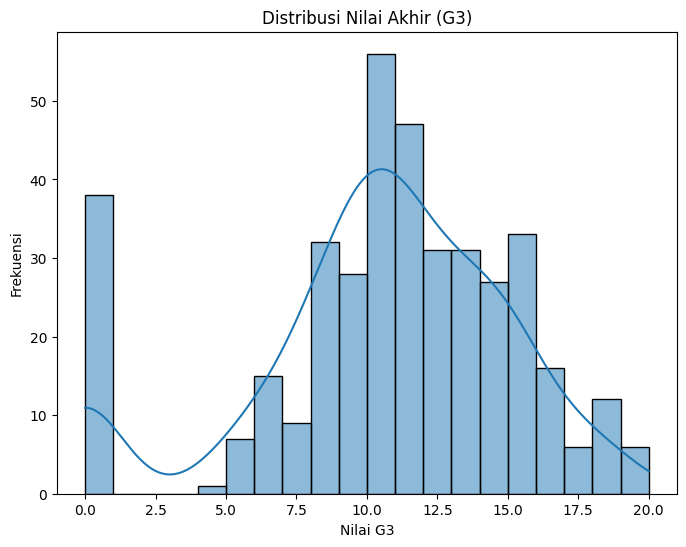

In [ ]:
# Visualisasi distribusi nilai akhir G3
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], kde=True, bins=20)
plt.title("Distribusi Nilai Akhir (G3)")
plt.xlabel("Nilai G3")
plt.ylabel("Frekuensi")
plt.show()


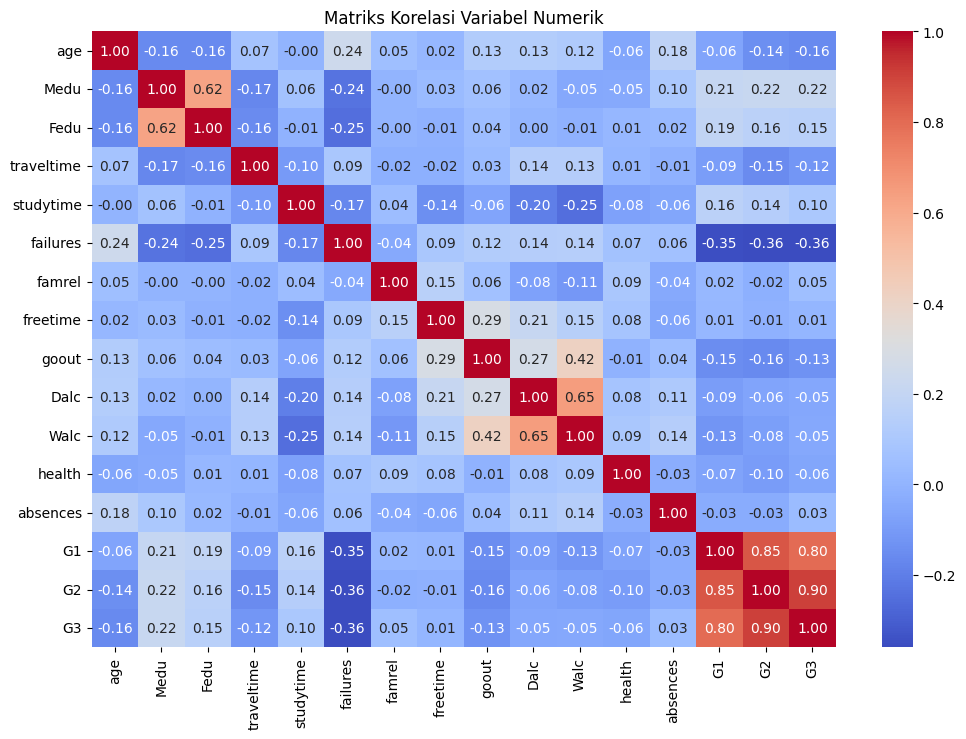

In [ ]:
# Menampilkan hanya kolom numerik dari dataset untuk korelasi
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Visualisasi Korelasi antar Variabel Numerik
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()


In [ ]:
# Step 4: Preprocessing Data
# Mengonversi nilai G3 menjadi kategori (Binning)
def categorize_grade(grade):
    if grade <= 9:
        return 'fail'
    elif 10 <= grade <= 14:
        return 'pass'
    else:
        return 'distinction'

df['G3_category'] = df['G3'].apply(categorize_grade)

# Encode target labels ('fail', 'pass', 'distinction') menjadi numerik
label_encoder = LabelEncoder()
df['G3_category_encoded'] = label_encoder.fit_transform(df['G3_category'])

# Drop kolom G3 asli
df = df.drop(['G3', 'G3_category'], axis=1)

# Memisahkan fitur dan label
X = df.drop('G3_category_encoded', axis=1)
y = df['G3_category_encoded']

# Ubah kolom kategori menjadi variabel dummy
X = pd.get_dummies(X, drop_first=True)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Membangun Pipeline Model Klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

In [ ]:
# Step 6: Melatih dan Mengevaluasi Model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'\n{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Logistic Regression Accuracy: 0.8151
              precision    recall  f1-score   support

 distinction       0.89      0.73      0.80        22
        fail       0.82      0.82      0.82        39
        pass       0.79      0.84      0.82        58

    accuracy                           0.82       119
   macro avg       0.83      0.80      0.81       119
weighted avg       0.82      0.82      0.81       119


Decision Tree Accuracy: 0.8487
              precision    recall  f1-score   support

 distinction       0.85      1.00      0.92        22
        fail       0.82      0.82      0.82        39
        pass       0.87      0.81      0.84        58

    accuracy                           0.85       119
   macro avg       0.85      0.88      0.86       119
weighted avg       0.85      0.85      0.85       119


K-Nearest Neighbors Accuracy: 0.6218
              precision    recall  f1-score   support

 distinction       0.73      0.36      0.48        22
        fail       0.

In [ ]:
# Step 7: Hyperparameter Tuning
# Contoh tuning hyperparameter untuk Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for Decision Tree:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.8621428571428572


In [ ]:
# Evaluasi model terbaik dari Grid Search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("\nEvaluasi Model Decision Tree Setelah Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Evaluasi Model Decision Tree Setelah Hyperparameter Tuning
Accuracy: 0.8319327731092437
              precision    recall  f1-score   support

 distinction       0.88      0.95      0.91        22
        fail       0.78      0.82      0.80        39
        pass       0.85      0.79      0.82        58

    accuracy                           0.83       119
   macro avg       0.84      0.86      0.84       119
weighted avg       0.83      0.83      0.83       119

Confusion Matrix:
[[21  0  1]
 [ 0 32  7]
 [ 3  9 46]]
